# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print("Library berhasil diimpor!")

Library berhasil diimpor!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [14]:
df = pd.read_csv("Dataset_inisiasi.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

===== Info Dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 62.6+ KB
None

===== Statistik Deskriptif =====
       Transaction ID         Age     Quantity  Price per Unit
count     1000.000000  1000.00000  1000.000000     1000.000000
mean       500.500000    41.39200     2.514000      179.890000
std        288.819436    13.68143     1.132734      189.681356
min          1.000000    18.00000     1.000000       25.000000
25%  

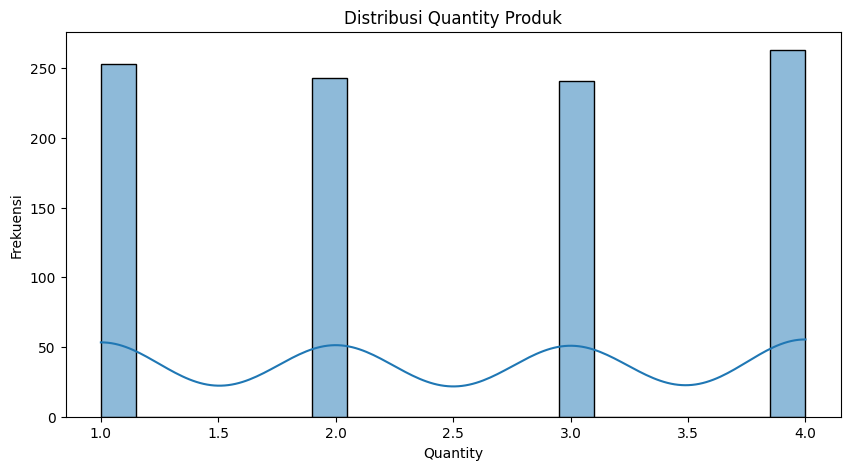

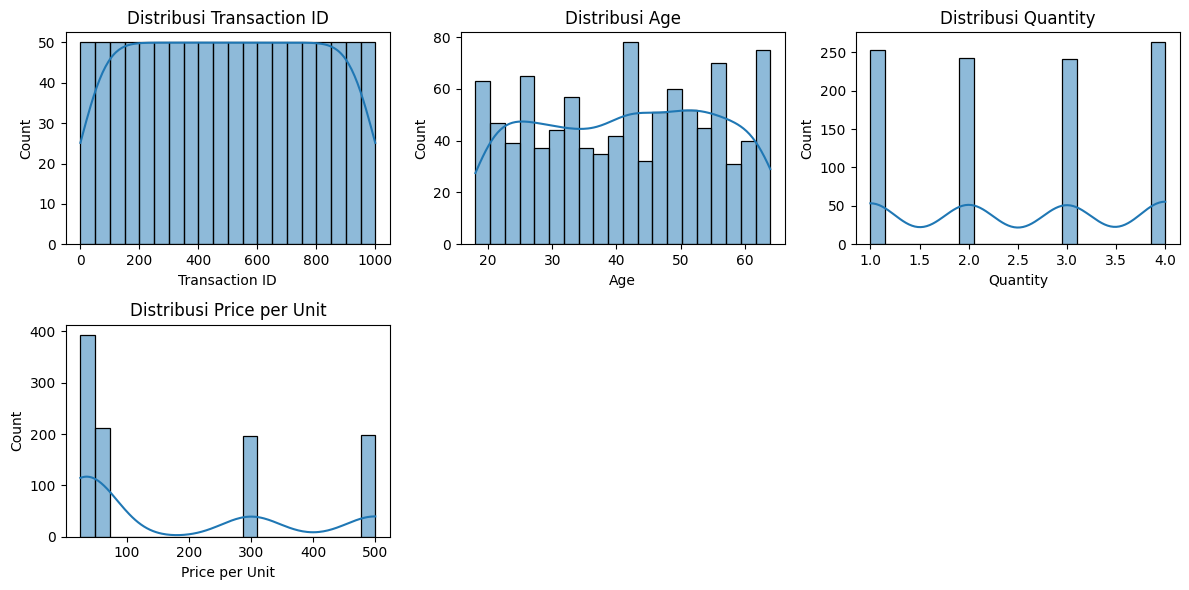

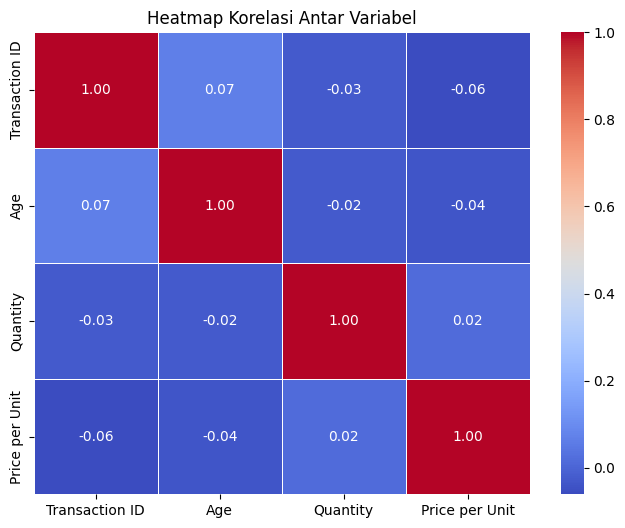

Kolom Kategorikal: Index(['Customer ID', 'Gender', 'Product Category'], dtype='object')


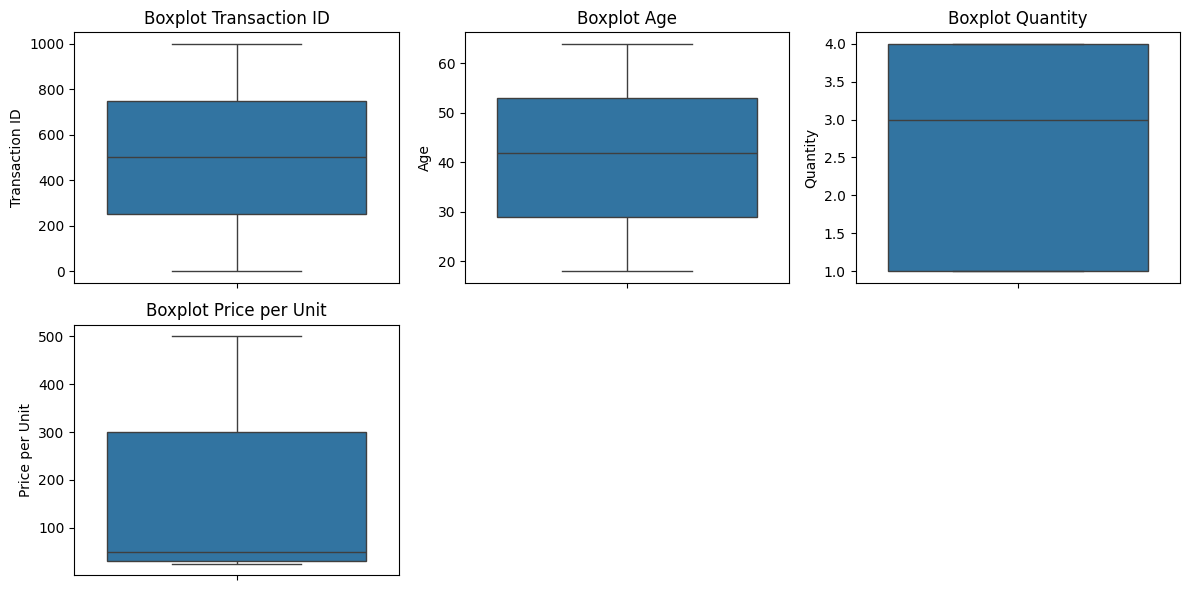

In [15]:
print("===== Info Dataset =====")
print(df.info())

print("\n===== Statistik Deskriptif =====")
print(df.describe())

print("\n===== Cek Data yang Hilang =====")
print(df.isnull().sum())
df.fillna(df.median(numeric_only=True), inplace=True)
for col in df.select_dtypes(include=["object"]).columns:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])
print(df.isnull().sum())

print("\n===== Ubah Tipe Data yang Salah =====")
if "Date" in df.columns: 
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
print(df.dtypes)

plt.figure(figsize=(10, 5))
sns.histplot(df["Quantity"], bins=20, kde=True)
plt.title("Distribusi Quantity Produk")
plt.xlabel("Quantity")
plt.ylabel("Frekuensi")
plt.show()

numerical_cols = df.select_dtypes(include=["number"]).columns

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, len(numerical_cols)//2 + 1, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Distribusi {col}")

plt.tight_layout()
plt.show()

df_numeric = df.select_dtypes(include=["number"])

plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

categorical_cols = df.select_dtypes(include=["object"]).columns
print("Kolom Kategorikal:", categorical_cols)

if "Product" in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x="Product Category", order=df["Product Category"].value_counts().index, palette="viridis")
    plt.xticks(rotation=45)
    plt.title("Produk yang Paling Banyak Dibeli")
    plt.show()
if "Quantity" in df.columns and "Price" in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x="Quantity", y="Price", alpha=0.7)
    plt.title("Hubungan antara Quantity dan Price")
    plt.show()

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, len(numerical_cols)//2 + 1, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot {col}")

plt.tight_layout()
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [16]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Product Category"] = le.fit_transform(df["Product Category"])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[["Age", "Quantity", "Price per Unit"]])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

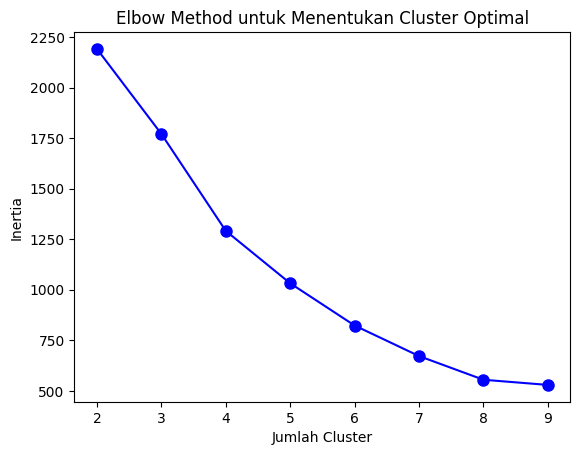

In [17]:
inertia = []
K = range(2, 10)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    inertia.append(model.inertia_)

plt.plot(K, inertia, "bo-", markersize=8)
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method untuk Menentukan Cluster Optimal")
plt.show()


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

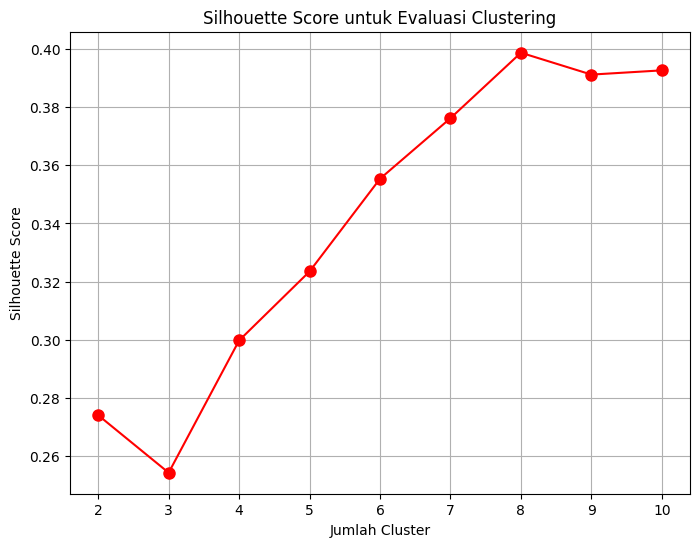

Jumlah cluster optimal berdasarkan Silhouette Score: 8


In [18]:
K = range(2, 11)
sil_scores = []

# Hitung silhouette score untuk setiap jumlah cluster
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    sil_scores.append(score)

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(K, sil_scores, "ro-", markersize=8)
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score untuk Evaluasi Clustering")
plt.grid(True)
plt.show()

# Tentukan jumlah cluster optimal dari score tertinggi
optimal_clusters = sil_scores.index(max(sil_scores)) + 2  # karena range dimulai dari 2
print(f"Jumlah cluster optimal berdasarkan Silhouette Score: {optimal_clusters}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [5]:
final_model = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = final_model.fit_predict(df_scaled)

df["Cluster"] = cluster_labels

NameError: name 'optimal_clusters' is not defined

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Quantity"], y=df["Price per Unit"], hue=df["Cluster"], palette="viridis")
plt.title("Visualisasi Cluster berdasarkan Quantity dan Price per Unit")
plt.xlabel("Quantity")
plt.ylabel("Price per Unit")
plt.legend(title="Cluster")
plt.show()

NameError: name 'df' is not defined

<Figure size 800x600 with 0 Axes>

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [10]:
cluster_summary = df.groupby("Cluster").agg({
    "Age": ["mean", "min", "max"],
    "Quantity": ["mean", "min", "max"],
    "Price per Unit": ["mean", "min", "max"],
    "Gender": lambda x: x.mode()[0],
    "Product Category": lambda x: x.mode()[0]
}).reset_index()


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [11]:
print(cluster_summary)

df_original = df.copy()
df_original[["Age", "Quantity", "Price per Unit"]] = scaler.inverse_transform(df_scaled)


  Cluster        Age          Quantity         Price per Unit            \
                mean min max      mean min max           mean  min  max   
0       0  29.529801  18  41  1.496689   1   2      35.264901   25   50   
1       1  51.103774  40  64  3.452830   3   4     388.679245  300  500   
2       2  29.172932  18  41  3.496241   3   4      35.601504   25   50   
3       3  53.587629  42  64  1.484536   1   2     409.278351  300  500   
4       4  28.821429  18  41  1.440476   1   2     411.904762  300  500   
5       5  53.341463  42  64  1.512195   1   2      34.786585   25   50   
6       6  28.275229  18  39  3.504587   3   4     395.412844  300  500   
7       7  52.480769  41  64  3.602564   3   4      35.416667   25   50   

    Gender Product Category  
  <lambda>         <lambda>  
0        1                2  
1        0                2  
2        0                0  
3        0                1  
4        0                0  
5        1                0  
6        

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

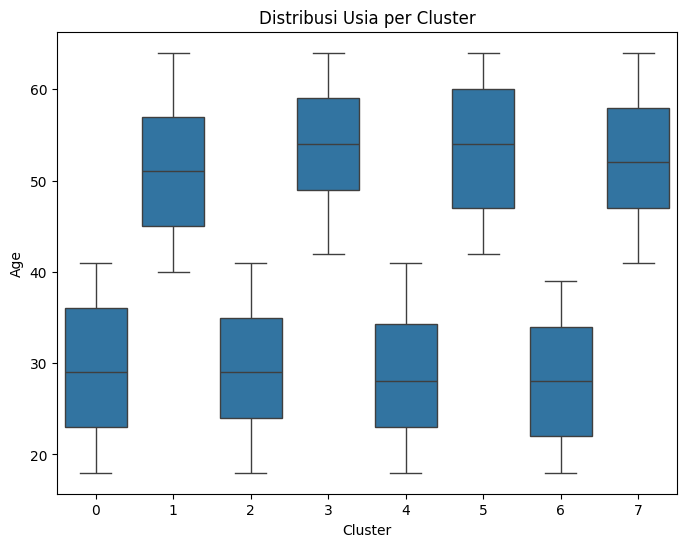

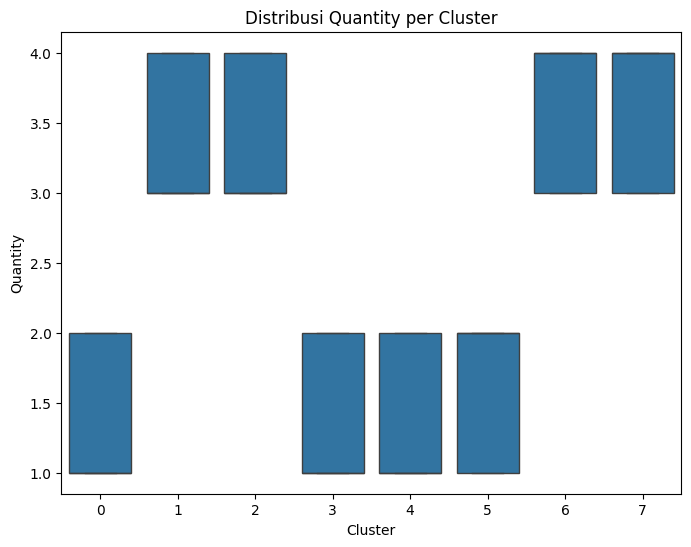

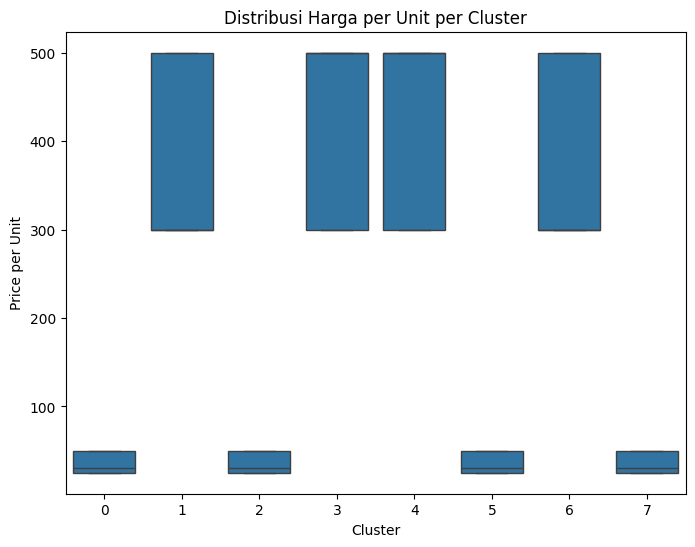

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Cluster", y="Age")
plt.title("Distribusi Usia per Cluster")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Cluster", y="Quantity")
plt.title("Distribusi Quantity per Cluster")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Cluster", y="Price per Unit")
plt.title("Distribusi Harga per Unit per Cluster")
plt.show()


Tulis hasil interpretasinya di sini.
1. Cluster 0 :
Usia: Rata-rata sekitar 29 tahun (rentang 18-41 tahun).

Quantity: Rata-rata sekitar 1-2 unit per transaksi.

Harga per Unit: Rendah, sekitar 25-50.

Analisis:
Cluster ini berisi pelanggan muda dengan pola pembelian dalam jumlah kecil dan harga unit rendah. Mereka kemungkinan lebih sensitif terhadap harga atau membeli produk dengan harga lebih murah.

2. Cluster 1 :
Usia: Rata-rata sekitar 51 tahun (rentang 40-64 tahun).

Quantity: Cenderung membeli dalam jumlah besar (3-4 unit).

Harga per Unit: Tinggi, sekitar 300-500.

Analisis:
Cluster ini terdiri dari pelanggan yang lebih tua dengan daya beli tinggi. Mereka cenderung membeli produk dengan harga mahal dalam jumlah lebih banyak, menunjukkan kecenderungan sebagai pelanggan premium.

3. Cluster 2 :
Usia: Rata-rata sekitar 29 tahun (rentang 18-41 tahun).

Quantity: Cenderung membeli dalam jumlah besar (3-4 unit).

Harga per Unit: Rendah, sekitar 25-50.

Analisis:
Pelanggan dalam cluster ini memiliki pola belanja yang mirip dengan Cluster 0 dalam hal usia dan harga produk yang dibeli, tetapi mereka membeli dalam jumlah lebih banyak.

4. Cluster 3 :
Usia: Rata-rata sekitar 53 tahun (rentang 42-64 tahun).

Quantity: Cenderung membeli dalam jumlah kecil (1-2 unit).

Harga per Unit: Tinggi, sekitar 300-500.

Analisis:
Pelanggan dalam cluster ini adalah kelompok usia yang lebih tua tetapi dengan kebiasaan belanja yang lebih konservatif dibandingkan Cluster 1. Mereka membeli produk premium tetapi dalam jumlah sedikit.

5. Cluster 4 :
Usia: Rata-rata sekitar 28 tahun (rentang 18-41 tahun).

Quantity: Membeli dalam jumlah kecil (1-2 unit).

Harga per Unit: Tinggi, sekitar 300-500.

Analisis:
Cluster ini mencerminkan pelanggan muda yang membeli produk mahal tetapi dalam jumlah kecil, mungkin karena keterbatasan anggaran atau preferensi terhadap produk berkualitas tinggi.

6. Cluster 5 :
Usia: Rata-rata sekitar 53 tahun (rentang 42-64 tahun).

Quantity: Membeli dalam jumlah kecil (1-2 unit).

Harga per Unit: Rendah, sekitar 25-50.

Analisis:
Pelanggan dalam cluster ini memiliki usia lebih tua tetapi memilih produk dengan harga lebih rendah. Ini mungkin mencerminkan kelompok pelanggan dengan daya beli lebih rendah atau preferensi untuk produk ekonomis.

7. Cluster 6 :
Usia: Rata-rata sekitar 28 tahun (rentang 18-39 tahun).

Quantity: Cenderung membeli dalam jumlah besar (3-4 unit).

Harga per Unit: Tinggi, sekitar 300-500.

Analisis:
Cluster ini mencerminkan pelanggan muda yang bersedia membeli produk mahal dalam jumlah lebih banyak, menunjukkan preferensi untuk barang berkualitas tinggi.

8. Cluster 7 :
Usia: Rata-rata sekitar 52 tahun (rentang 41-64 tahun).

Quantity: Cenderung membeli dalam jumlah besar (3-4 unit).

Harga per Unit: Rendah, sekitar 25-50.

Analisis:
Pelanggan di cluster ini lebih tua tetapi memilih produk dengan harga lebih rendah dan dalam jumlah lebih banyak. Ini bisa menunjukkan strategi pembelian hemat dengan pembelian dalam jumlah besar.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [14]:
df.to_csv("Dataset_clustering.csv", index=False)
print("Data berhasil diekspor!")

Data berhasil diekspor!
